## 想觀察購物間隔與購物頻率及購買金額間的關係¶

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [3]:
member = pd.read_csv('NTU_1317_Member.txt',header = 0,sep = "\t")

/Users/liuqieru/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 匯入91app_dataset

In [4]:
df = pd.read_csv('Ntu_Orders.csv')

### 對他的日期進行處理轉換，新變項取名為new_DateId

In [5]:

df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format="%Y%m%d")

In [6]:
df.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,2017-01-01
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,2017-01-01
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,2017-01-02


In [7]:
member.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,AnnualIncomeTypeDef,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,NaN,2015-09-18 19:18:48.050,iOSApp,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940
1,1317,AB3232A1-03C6-4425-8062-EEECB633FB5A,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2016-03-13 01:11:05.403,Web,1,1900-01-01,NaN,NaN,NaN,NaN,NaN
2,1317,CC63B70D-CD6D-4538-BDDE-4B293F95A654,659,1,529.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2016-03-20 02:20:35.493,Web,1,2016-03-20,2016-03-20,NaN,NaN,NaN,NaN
3,1317,17ED6C4D-0B91-4EB4-9992-117E9440425D,56,3,2438.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2017-06-02 22:16:47.363,Web,1,2017-06-02,2017-10-27,NaN,NaN,NaN,NaN
4,1317,1BA9F6E3-67FD-4AAF-8011-2CBEA98B4828,717,1,550.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2016-01-22 14:46:30.040,Web,1,2016-01-22,2016-01-22,有,NaN,2016-01-22 14:50:32.173,2017-02-21 05:51:05.080


In [8]:
member['RegisterDateTime'].head()

0    2015-09-18 19:18:48.050
1    2016-03-13 01:11:05.403
2    2016-03-20 02:20:35.493
3    2017-06-02 22:16:47.363
4    2016-01-22 14:46:30.040
Name: RegisterDateTime, dtype: object

### 將member資料中的RegisterDateTime(註冊時間)做時間切割的處理，切出年-月-日
參考自：https://stackoverflow.com/questions/30132282/datetime-to-string-with-series-in-python-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

In [9]:
from datetime import datetime
dates = pd.to_datetime(member['RegisterDateTime'], format = '%Y-%m-%d %H:%M:%S.%f')

In [10]:
dates.head()

0   2015-09-18 19:18:48.050
1   2016-03-13 01:11:05.403
2   2016-03-20 02:20:35.493
3   2017-06-02 22:16:47.363
4   2016-01-22 14:46:30.040
Name: RegisterDateTime, dtype: datetime64[ns]

### 在member資料新增一個欄位叫做new_DateId

In [11]:
member['new_DateId'] = dates.apply(lambda x: x.strftime('%Y-%m-%d'))

In [12]:
member.head(3)

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,2015-09-18 19:18:48.050,iOSApp,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940,2015-09-18
1,1317,AB3232A1-03C6-4425-8062-EEECB633FB5A,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-13 01:11:05.403,Web,1,1900-01-01,NaN,NaN,NaN,NaN,NaN,2016-03-13
2,1317,CC63B70D-CD6D-4538-BDDE-4B293F95A654,659,1,529.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-20 02:20:35.493,Web,1,2016-03-20,2016-03-20,NaN,NaN,NaN,NaN,2016-03-20


### 將member與91app_dataset根據new_DateId相同的部分來做資料的整併

In [13]:
cdf = pd.concat([df, member])

In [14]:
cdf.head(20)

,AnnualIncomeTypeDef,Birthday,DateId,DependentsTypeDef,EcouponDiscount,EcouponId,EducationTypeDef,Frequency,GenderTypeDef,IsAppInstalled,...,ShippingProfileTypeDef,ShopId,TrackChannelTypeDef,TrackDeviceTypeDef,TrackSourceTypeDef,TradesOrderGroupCode,TradesOrderSlaveId,UnitPrice,ValidFlag,new_DateId
0,NaN,NaN,20170103.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,SevenEleven,1317,Brand,Mobile,Web,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,26971960.0,399.0,NaN,2017-01-03 00:00:00
1,NaN,NaN,20170103.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,SevenEleven,1317,Brand,Mobile,Web,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,26971961.0,399.0,NaN,2017-01-03 00:00:00
2,NaN,NaN,20170101.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,26825136.0,350.0,NaN,2017-01-01 00:00:00
3,NaN,NaN,20170101.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",26837997.0,540.0,NaN,2017-01-01 00:00:00
4,NaN,NaN,20170102.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,26881442.0,445.0,NaN,2017-01-02 00:00:00
5,NaN,NaN,20170103.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,b'\x9a\xee\xee\xb30pf8d\x0bp\x8b\xaa\xde\xa8\x...,26938659.0,180.0,NaN,2017-01-03 00:00:00
6,NaN,NaN,20170104.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,"b'\x9e\xc5{\xe4\xfd_\xa9XP\x19*\xc4\x9c""\x0b%\...",26986470.0,249.0,NaN,2017-01-04 00:00:00
7,NaN,NaN,20170104.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,b'\xf7\xca\xed\xd5\xaf{\xfem\xa4\x88\x16)0\x88...,26999964.0,249.0,NaN,2017-01-04 00:00:00
8,NaN,NaN,20170104.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,Family,1317,Brand,Mobile,Web,"b'\t\x90\xf9\xe6sc\x9d\xe3%eZ,C$\x8f{~\xe6`\xa8'",27002656.0,250.0,NaN,2017-01-04 00:00:00
9,NaN,NaN,20170103.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,SevenEleven,1317,Brand,Mobile,Web,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,26971962.0,399.0,NaN,2017-01-03 00:00:00


In [15]:
cdf['RegisterSourceTypeDef'].tail(20)

815772    AndroidApp
815773           Web
815774           Web
815775           Web
815776    AndroidApp
815777        iOSApp
815778           Web
815779    AndroidApp
815780           Web
815781           Web
815782           Web
815783           Web
815784           Web
815785        iOSApp
815786           Web
815787           Web
815788           Web
815789           Web
815790    AndroidApp
815791           Web
Name: RegisterSourceTypeDef, dtype: object

### 計算member資料中的產品回購率=>想做出每個月份的產品回購率

#### 先抓出第一次購買日期及最後一次購買日期的人數

In [16]:
member['MinOrderDate'].head(3)

0    2015-09-18
1    1900-01-01
2    2016-03-20
Name: MinOrderDate, dtype: object

### 先將 第一次購買日期 為空值的data剔除，存成新的data，minmember_notNA

In [17]:
key = member["MinOrderDate"].isnull()
minmember_NA = member.loc[key]
minmember_notNA = member.loc[~key]
len(minmember_notNA)

815792

In [18]:
minmember_notNA.head(5)

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,2015-09-18 19:18:48.050,iOSApp,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940,2015-09-18
1,1317,AB3232A1-03C6-4425-8062-EEECB633FB5A,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-13 01:11:05.403,Web,1,1900-01-01,NaN,NaN,NaN,NaN,NaN,2016-03-13
2,1317,CC63B70D-CD6D-4538-BDDE-4B293F95A654,659,1,529.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-20 02:20:35.493,Web,1,2016-03-20,2016-03-20,NaN,NaN,NaN,NaN,2016-03-20
3,1317,17ED6C4D-0B91-4EB4-9992-117E9440425D,56,3,2438.0,NaN,NaN,NaN,NaN,NaN,...,2017-06-02 22:16:47.363,Web,1,2017-06-02,2017-10-27,NaN,NaN,NaN,NaN,2017-06-02
4,1317,1BA9F6E3-67FD-4AAF-8011-2CBEA98B4828,717,1,550.0,NaN,NaN,NaN,NaN,NaN,...,2016-01-22 14:46:30.040,Web,1,2016-01-22,2016-01-22,有,NaN,2016-01-22 14:50:32.173,2017-02-21 05:51:05.080,2016-01-22


### 再利用minmember_notNA來找最後一次購買也有購買的人數=>第一次購買且最後一次也有購買的人=>給一個新的變項名稱：minmaxber_notNA

In [19]:
key = minmember_notNA["MaxOrderDate"].isnull()
minmaxmember_NA = minmember_notNA.loc[key]
minmaxber_notNA = minmember_notNA.loc[~key]
len(minmaxber_notNA)

532376

### 計算回購率

In [20]:
customerbuyrate = len(minmaxber_notNA)/len(minmember_notNA)

In [21]:
customerbuyrate

0.6525879145664581

## 就回購率來說：以(第一次購買人數&&最後一次購買人數)/第一次購買的人數，在member這份data的值是 65%左右

### 再從第一次購買人數&&最後一次購買的data中，來看Recency(上一次購物間隔)、Frequency(購物周期內購物次數)、Monetary(購買金額)的情況

In [22]:
x =minmaxber_notNA['Recency'] 

In [23]:
minmaxber_notNA['Recency'].head()

0    251
2    659
3     56
4    717
5     13
Name: Recency, dtype: int64

In [24]:
y = minmaxber_notNA['Frequency']

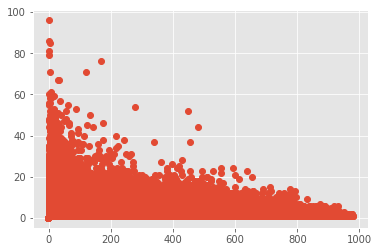

In [25]:
plt.plot(x, y, "o")

### 抓出Recency<100的


In [69]:
new = minmaxber_notNA[minmaxber_notNA['Recency'] < 100]

In [70]:
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
3,1317,17ED6C4D-0B91-4EB4-9992-117E9440425D,56,3,2438.0,NaN,NaN,NaN,NaN,NaN,...,2017-06-02 22:16:47.363,Web,1,2017-06-02,2017-10-27,NaN,NaN,NaN,NaN,2017-06-02
5,1317,E697E909-3142-4686-A7C6-540909465169,13,3,2651.0,NaN,NaN,NaN,NaN,NaN,...,2015-10-01 20:13:05.657,Web,1,2015-10-01,2015-10-16,NaN,NaN,NaN,NaN,2015-10-01
7,1317,D8A55D64-AEB0-4DC4-85C6-3372238C46D3,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,2017-03-19 13:13:10.527,Web,1,2017-03-19,2017-03-19,NaN,NaN,NaN,NaN,2017-03-19
9,1317,761C39F9-CDA6-44E2-AFA8-7A1CAA037573,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,2016-04-25 21:46:57.683,Web,1,2016-12-29,2016-12-29,NaN,NaN,NaN,NaN,2016-04-25
12,1317,7A3C8291-59AC-47C2-A22B-64AFC324619B,36,9,13489.0,1987-01-21,Female,NaN,高雄市,台灣,...,2016-09-04 23:42:52.570,AndroidApp,1,2016-09-04,2017-08-05,有,NaN,2016-09-01 15:21:25.957,2017-07-14 07:02:36.593,2016-09-04


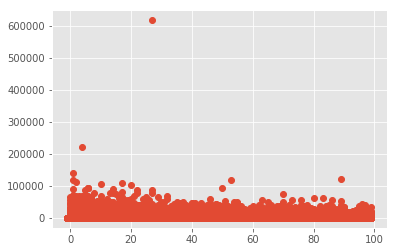

In [71]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [72]:
len(new)

137546

### 這樣的data數有137546

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

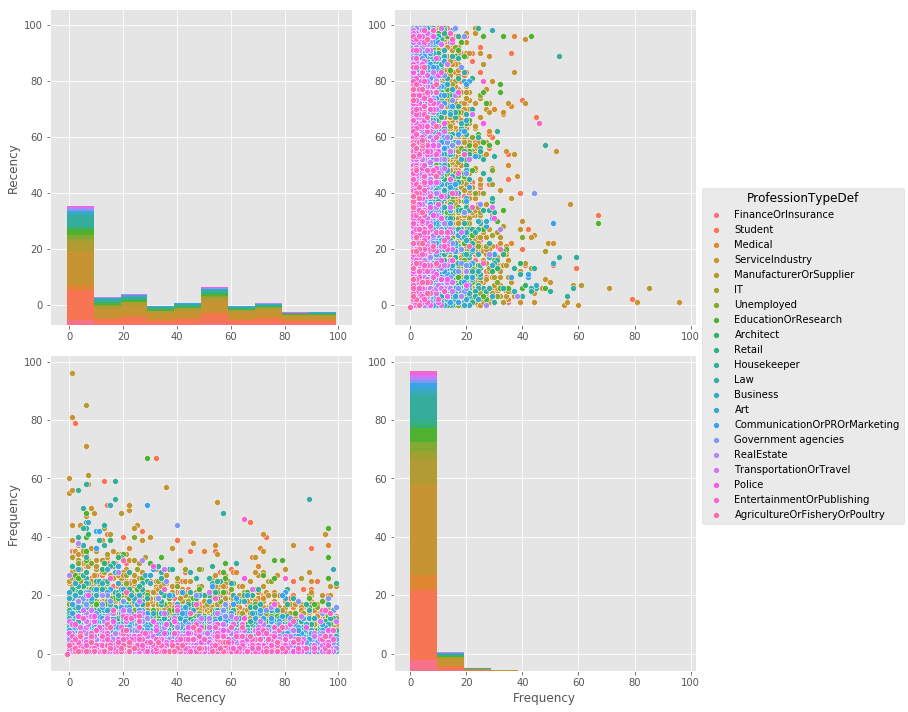

In [73]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)

### 抓出Recency介於100~200間的資料

In [52]:
new = minmaxber_notNA[minmaxber_notNA['Recency'].between(100,200)]

In [53]:
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
8,1317,978EBCAE-9E66-44D9-926B-D35B0C1079E9,190,1,1174.0,NaN,NaN,NaN,NaN,NaN,...,2017-07-02 10:58:30.220,Web,1,2017-07-02,2017-07-02,NaN,NaN,NaN,NaN,2017-07-02
11,1317,A8E7F918-8B05-422E-A9F9-F4972E1186E0,165,2,2508.0,1986-07-15,Female,NaN,台北市,台灣,...,2017-04-30 20:43:30.083,Web,1,2017-05-01,2017-07-27,有,NaN,2017-04-30 23:13:29.093,2017-08-30 00:02:57.377,2017-04-30
25,1317,44DFCAC0-B57B-440C-904A-85E7F14DE034,180,1,1230.0,NaN,NaN,NaN,NaN,NaN,...,2017-07-12 21:56:51.550,Web,1,2017-07-12,2017-07-12,NaN,NaN,NaN,NaN,2017-07-12
71,1317,8D85E870-7935-447D-8DE4-5DFAFDA578DD,166,1,2192.0,NaN,NaN,NaN,NaN,NaN,...,2017-07-24 13:07:11.720,Web,1,2017-07-26,2017-07-26,NaN,NaN,NaN,NaN,2017-07-24
73,1317,8A289E83-416B-4930-A4E2-EDC6C64E2796,183,1,180.0,NaN,NaN,NaN,NaN,NaN,...,2017-07-09 18:36:53.357,Web,1,2017-07-09,2017-07-09,NaN,NaN,NaN,NaN,2017-07-09


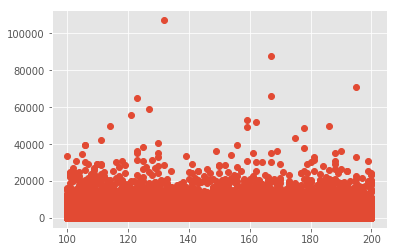

In [54]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [55]:
len(new)

58655

這樣的data數有58655

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

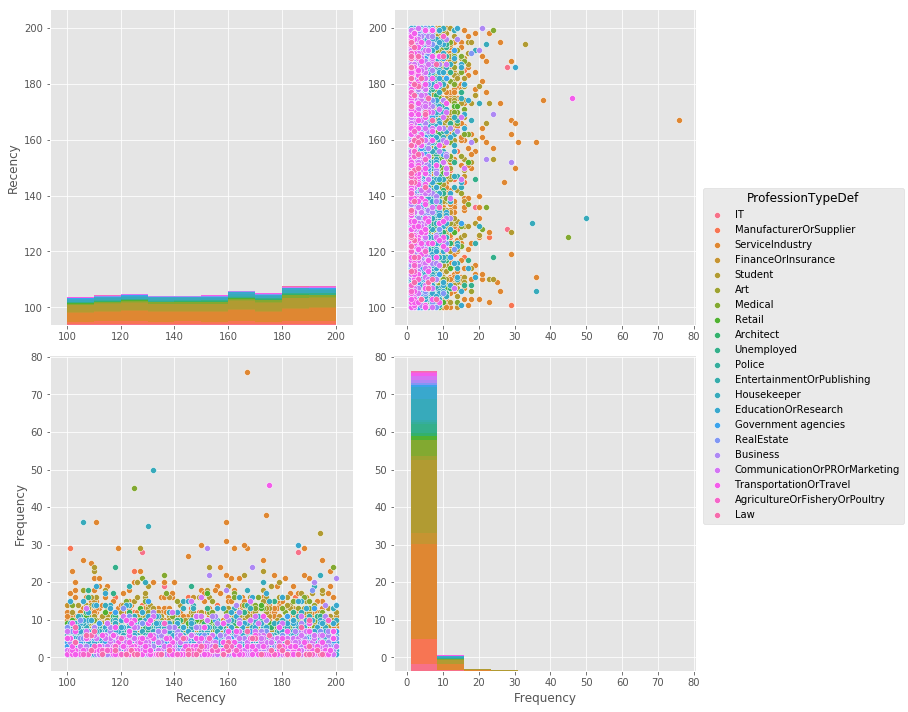

In [56]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)

### 抓出Recency介於200~400間的資料

In [57]:
new = minmaxber_notNA[minmaxber_notNA['Recency'].between(200,400)]
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,2015-09-18 19:18:48.050,iOSApp,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940,2015-09-18
18,1317,B3E3DE19-15AE-42ED-91FB-19E18177531A,359,1,2108.0,NaN,NaN,NaN,NaN,NaN,...,2017-01-14 20:37:40.677,Web,1,2017-01-14,2017-01-14,有,NaN,2017-01-30 17:53:11.957,2017-04-11 05:44:45.480,2017-01-14
21,1317,CFD48B12-770D-4AE8-BCF5-1543C8242320,273,2,2774.0,NaN,NaN,NaN,NaN,NaN,...,2016-10-18 00:52:11.473,Web,1,2016-10-18,2017-04-10,NaN,NaN,NaN,NaN,2016-10-18
30,1317,8E762431-827D-425E-AFE9-458FA565D2FC,328,1,689.0,NaN,NaN,NaN,NaN,NaN,...,2017-02-14 20:17:36.923,Web,1,2017-02-14,2017-02-14,NaN,NaN,NaN,NaN,2017-02-14
39,1317,023B2D1C-2CD8-4AB9-91E2-38FB96CF08D3,396,3,4770.0,1998-01-06,Female,NaN,桃園市,台灣,...,2015-12-10 00:30:34.497,Web,1,2016-10-21,2016-12-08,有,NaN,2015-12-11 17:37:42.847,2016-12-13 14:38:05.013,2015-12-10


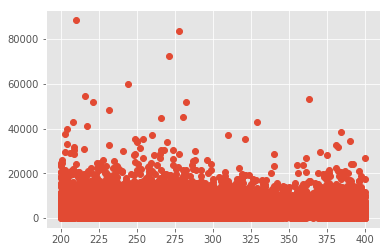

In [58]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [59]:
len(new)

109068

這樣的data數有109068

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

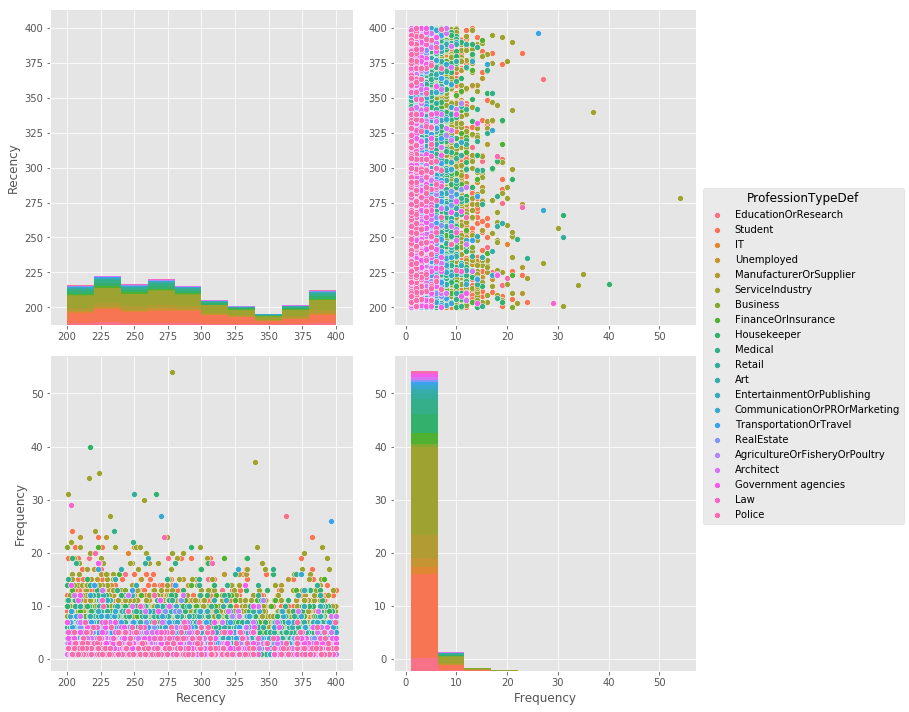

In [60]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)

### 抓出Recency介於400~600間的資料

In [61]:
new = minmaxber_notNA[minmaxber_notNA['Recency'].between(400,600)]
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
15,1317,FE0428CE-1DDE-4419-9B0F-459BE501C855,481,1,693.0,NaN,NaN,NaN,NaN,NaN,...,2016-09-14 10:41:32.337,Web,1,2016-09-14,2016-09-14,NaN,NaN,NaN,NaN,2016-09-14
16,1317,84152EFC-EE1C-4E31-AA8A-B86E6B9B5A73,588,1,747.0,NaN,NaN,NaN,NaN,NaN,...,2016-05-29 23:34:45.587,Web,1,2016-05-30,2016-05-30,有,NaN,2016-05-29 23:56:10.310,2016-06-14 12:27:49.917,2016-05-29
22,1317,2B73AC64-4794-4676-8954-337131A2A666,467,1,783.0,NaN,NaN,NaN,NaN,NaN,...,2016-09-28 11:14:10.760,Web,1,2016-09-28,2016-09-28,NaN,NaN,NaN,NaN,2016-09-28
34,1317,ED23A898-4B87-4BF6-B3F2-F7788D4A097E,555,1,923.0,NaN,NaN,NaN,NaN,NaN,...,2016-07-02 13:07:07.453,Web,1,2016-07-02,2016-07-02,NaN,NaN,NaN,NaN,2016-07-02
41,1317,387718C6-ECAC-43ED-87D3-440CEE7B8F10,597,2,1976.0,NaN,NaN,NaN,NaN,NaN,...,2016-04-10 10:26:17.320,Web,1,2016-04-10,2016-05-21,有,NaN,2016-04-10 10:29:42.750,2017-04-09 05:47:32.567,2016-04-10


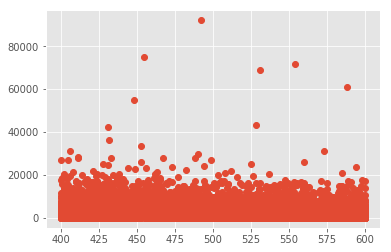

In [62]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [63]:
len(new)

122802

這樣的data數有122802

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

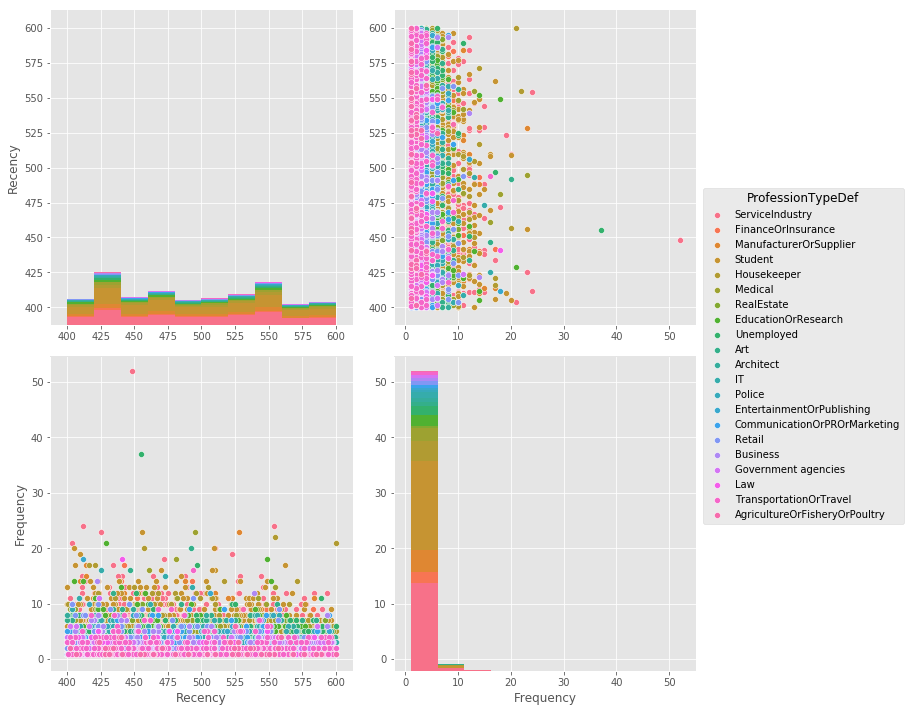

In [64]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)

### 抓出Recency介於600~800間的資料¶

In [65]:
new = minmaxber_notNA[minmaxber_notNA['Recency'].between(600,800)]
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
2,1317,CC63B70D-CD6D-4538-BDDE-4B293F95A654,659,1,529.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-20 02:20:35.493,Web,1,2016-03-20,2016-03-20,NaN,NaN,NaN,NaN,2016-03-20
4,1317,1BA9F6E3-67FD-4AAF-8011-2CBEA98B4828,717,1,550.0,NaN,NaN,NaN,NaN,NaN,...,2016-01-22 14:46:30.040,Web,1,2016-01-22,2016-01-22,有,NaN,2016-01-22 14:50:32.173,2017-02-21 05:51:05.080,2016-01-22
19,1317,A1A54713-CB23-4BC0-BA10-C2430CCF11B0,649,1,948.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-30 19:51:50.397,Web,1,2016-03-30,2016-03-30,NaN,NaN,NaN,NaN,2016-03-30
35,1317,D2C4288E-733B-4487-8D09-E5F7189332B2,759,3,2867.0,1979-02-18,Female,NaN,台中市,台灣,...,2015-10-13 16:51:07.783,AndroidApp,1,2015-10-16,2015-12-11,有,NaN,2015-10-13 16:49:15.177,2016-02-18 00:45:12.773,2015-10-13
36,1317,FA444442-35FF-488B-A0E9-625863DBC3C7,755,1,689.0,1988-06-23,Female,NaN,苗栗縣,台灣,...,2015-11-19 23:26:20.070,iOSApp,1,2015-12-15,2015-12-15,有,NaN,2015-11-19 23:24:57.813,2017-07-25 05:44:17.863,2015-11-19


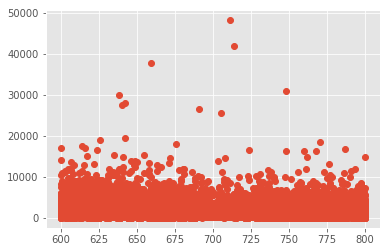

In [66]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [67]:
len(new)

75018

這樣的data數有75018

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

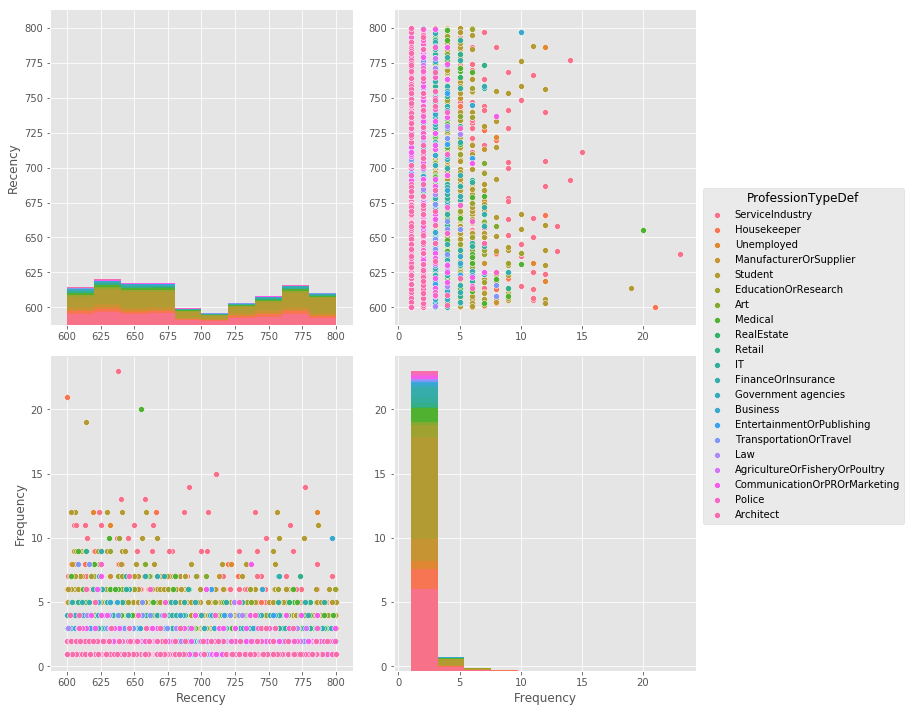

In [68]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)

### 抓出Recency>800的資料¶

In [43]:
new = minmaxber_notNA[minmaxber_notNA['Recency'] > 800]
new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,RegisterDateTime,RegisterSourceTypeDef,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,new_DateId
51,1317,D49E7D36-AC63-443A-9AB7-F247358C8C16,830,1,516.0,NaN,NaN,NaN,NaN,NaN,...,2015-10-01 20:16:20.807,iOSApp,1,2015-10-01,2015-10-01,有,NaN,2015-10-01 20:15:25.447,2015-10-15 22:13:33.397,2015-10-01
55,1317,6F9296FB-17B3-42E8-BC10-7926921BE941,808,1,329.0,NaN,NaN,NaN,NaN,NaN,...,2015-10-23 23:10:37.820,Web,1,2015-10-23,2015-10-23,NaN,NaN,NaN,NaN,2015-10-23
99,1317,4BF5E7EA-25DF-42E0-91D4-B2948FE1B9F7,820,1,1511.0,NaN,NaN,NaN,NaN,NaN,...,2015-10-11 11:19:58.537,iOSApp,1,2015-10-11,2015-10-11,有,NaN,2015-10-11 11:19:18.033,2015-10-11 11:19:58.633,2015-10-11
100,1317,14C3C99C-3729-419D-A263-EA4628BAA336,950,1,1762.0,NaN,NaN,NaN,NaN,NaN,...,2015-07-14 16:37:48.897,NaN,1,2015-06-03,2015-06-03,NaN,NaN,NaN,NaN,2015-07-14
133,1317,13B81EBE-6F38-49FE-9F7D-75C7637B1C23,933,1,1305.0,NaN,NaN,NaN,NaN,NaN,...,2015-07-14 16:37:52.403,NaN,1,2015-06-20,2015-06-20,NaN,NaN,NaN,NaN,2015-07-14


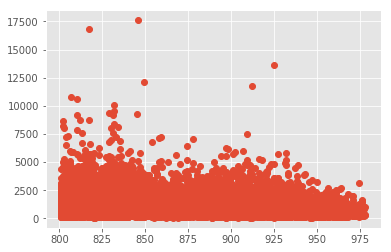

In [44]:
x =new['Recency'] 
y = new['Monetary']
plt.plot(x, y, "o")

In [45]:
len(new)

30819

這樣的data數有75018

### 繪製圖，以Recency與Frequency來做x,y軸，ProfessionTypeDef來當作分類的部分

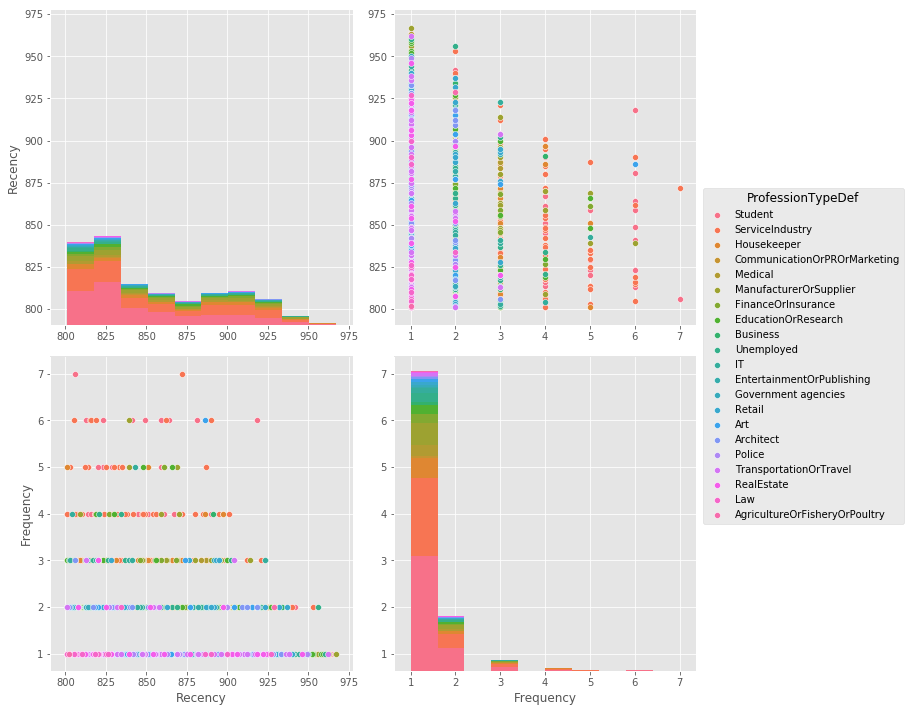

In [46]:
sns.pairplot(vars=["Recency","Frequency"], data=new, hue="ProfessionTypeDef", size=5)